# Лабораторная работа 1

## Методы решения задач линейной алгебры

### 1.1

**Реализовать алгоритм LU** - разложения матриц (с выбором главного элемента) в виде программы. Используя разработанное программное обеспечение, решить систему линейных алгебраических уравнений (СЛАУ). Для матрицы СЛАУ вычислить определитель и обратную матрицу.

In [2]:
def matrix_multiply(A, B):
    # Умножает две матрицы A и B с использованием генератора списков и функции zip
    return [[sum(a*b for a, b in zip(A_row, B_col)) for B_col in zip(*B)] for A_row in A]

def create_zero_matrix(n, m=None):
    # Создает нулевую матрицу размером n x m (или n x n, если m не указан)
    if m is None:
        m = n
    return [[0 for _ in range(m)] for _ in range(n)]

def create_identity_matrix(n):
    # Создает единичную матрицу размера n x n
    return [[1 if i == j else 0 for j in range(n)] for i in range(n)]

def swap_rows(M, i, j):
    # Меняет местами две строки i и j в матрице M
    M[i], M[j] = M[j], M[i]

def pivot_matrix(M):
    # Создает матрицу перестановок для матрицы M для управления выбором опорного элемента
    m = len(M)
    ID = create_identity_matrix(m)
    for j in range(m):
        row = max(range(j, m), key=lambda i: abs(M[i][j]))
        if j != row:
            swap_rows(ID, j, row)
    return ID

def lu_decomposition(A):
    # Выполняет LU-разложение с использованием алгоритма Дулиттла с частичным выбором главного элемента
    n = len(A)
    L = create_zero_matrix(n)
    U = create_zero_matrix(n)
    P = pivot_matrix(A)
    PA = matrix_multiply(P, A)
    for j in range(n):
        L[j][j] = 1
        for i in range(j+1):
            s1 = sum(U[k][j] * L[i][k] for k in range(i))
            U[i][j] = PA[i][j] - s1
        for i in range(j, n):
            s2 = sum(U[k][j] * L[i][k] for k in range(j))
            L[i][j] = (PA[i][j] - s2) / U[j][j] if U[j][j] != 0 else 0
    return P, L, U

def lu_solve(L, U, P, b):
    # Решает систему линейных уравнений Ax = b с использованием LU-разложения
    n = len(L)
    y = [0] * n
    x = [0] * n
    Pb = matrix_multiply(P, [[bi] for bi in b])
    for i in range(n):
        y[i] = Pb[i][0] - sum(L[i][j] * y[j] for j in range(i))
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - sum(U[i][j] * x[j] for j in range(i+1, n))) / U[i][i]
    return x

def lu_inverse(L, U, P):
    # Вычисляет обратную матрицу A с использованием ее LU-разложения
    n = len(L)
    invA = create_zero_matrix(n)
    for i in range(n):
        e = [0] * n
        e[i] = 1
        invA_col = lu_solve(L, U, P, e)
        for j in range(n):
            invA[j][i] = invA_col[j]
    return invA

def rationalize(num, tol=1e-6):
    # Преобразует число с плавающей точкой в строковое представление рационального числа
    from fractions import Fraction
    if abs(num - round(num)) <= tol:
        return str(int(round(num)))
    else:
        return str(Fraction(num).limit_denominator())

def format_solution(x):
    # Форматирует список чисел в их рациональные строковые представления
    return [rationalize(num) for num in x]

def format_matrix(mat):
    # Форматирует каждое число в матрице в рациональное строковое представление
    return [[rationalize(num) for num in row] for row in mat]

def determinant(P, U):
    # Вычисляет детерминант исходной матрицы с использованием матриц перестановок и верхней треугольной матрицы
    det_P = -1 if sum(P[i][i] for i in range(len(P))) < len(P) else 1
    det_U = 1
    for i in range(len(U)):
        det_U *= U[i][i]
    return det_P * det_U

A = [
    [1, -5, -7, 1],
    [1, -3, -9, -4],
    [-2, 4, 2, 1],
    [-9, 9, 5, 3]
]

b = [-75, -41, 18, 29]

# LU-разложение и решение системы линейных уравнений
P, L, U = lu_decomposition(A)
x = lu_solve(L, U, P, b)
invA = lu_inverse(L, U, P)
detA = determinant(P, U)

L_formatted = format_matrix(L)
U_formatted = format_matrix(U)
P_formatted = format_matrix(P)
x_formatted = format_solution(x)
invA_formatted = format_matrix(invA)
PA = matrix_multiply(P, A)
PA_formatted = format_matrix(PA)
LU = matrix_multiply(L, U)
LU_formatted = format_matrix(LU)
PLU = matrix_multiply(P, matrix_multiply(L, U))
PLU_formatted = format_matrix(PLU)

# Проверка обратной матрицы путем умножения invA * A = I (единичная матрица)
A_check = matrix_multiply(invA, A)
A_check_formatted = format_matrix(A_check)

# Вывод результатов
print("Матрица перестановок P:")
for row in P_formatted:
    print(' '.join(row))

print("\nМатрица PA (P * A):")
for row in PA_formatted:
    print(' '.join(row))

print("\nМатрица L:")
for row in L_formatted:
    print(' '.join(row))

print("\nМатрица U:")
for row in U_formatted:
    print(' '.join(row))

print("\nМатрица LU (L * U):")
for row in LU_formatted:
    print(' '.join(row))

print("\nМатрица PLU (P * L * U):")
for row in PLU_formatted:
    print(' '.join(row))

print("\nРешение системы:", ' '.join(x_formatted))
print("\nОпределитель:", detA)

print("\nОбратная матрица:")
for row in invA_formatted:
    print(' '.join(row))

print("\nПроверка (Обратная матрица * A = Единичная матрица):")
for row in A_check_formatted:
    print(' '.join(row))

Матрица перестановок P:
0 0 0 1
1 0 0 0
0 1 0 0
0 0 1 0

Матрица PA (P * A):
-9 9 5 3
1 -5 -7 1
1 -3 -9 -4
-2 4 2 1

Матрица L:
1 0 0 0
-1/9 1 0 0
-1/9 1/2 1 0
2/9 -1/2 21/47 1

Матрица U:
-9 9 5 3
0 -4 -58/9 4/3
0 0 -47/9 -13/3
0 0 0 138/47

Матрица LU (L * U):
-9 9 5 3
1 -5 -7 1
1 -3 -9 -4
-2 4 2 1

Матрица PLU (P * L * U):
-2 4 2 1
-9 9 5 3
1 -5 -7 1
1 -3 -9 -4

Решение системы: 2 4 7 -8

Определитель: 552.0

Обратная матрица:
2/69 -3/92 145/276 -21/92
1/138 5/92 157/276 -11/92
-5/46 -3/46 -13/46 1/23
17/69 -7/46 47/138 -3/46

Проверка (Обратная матрица * A = Единичная матрица):
1 0 0 0
0 1 0 0
0 0 1 0
0 0 0 1


### 1.2
Реализовать метод прогонки в виде программы, задавая в качестве входных данных ненулевые элементы матрицы системы и вектор правых частей. Используя разработанное программное обеспечение, решить СЛАУ с трехдиагональной матрицей.

In [2]:
def solve_tridiagonal(a, b, c, d):
    """
    Решает уравнение Ax = d, где A - трехдиагональная матрица, состоящая из векторов a, b, c.
    """
    n = len(d)
    w = [0] * (n-1)
    g = [0] * n
    p = [0] * n

    w[0] = c[0] / b[0]
    g[0] = d[0] / b[0]

    # Прямой проход метода прогонки
    for i in range(1, n):
        w[i-1] = c[i-1] / (b[i-1] - a[i-1] * w[i-2])
    for i in range(1, n):
        g[i] = (d[i] - a[i] * g[i-1]) / (b[i] - a[i] * w[i-1])

    # Обратный проход метода прогонки
    p[n-1] = g[n-1]
    for i in range(n-2, -1, -1):
        p[i] = g[i] - w[i] * p[i+1]
    return p

a = [0, 2, 4, -3, 3]  # нижняя диагональ, a_1 равно нулю
b = [15, -15, 11, 16, 8]  # главная диагональ
c = [8, 4, 5, -7]  # верхняя диагональ, c_5 не существует
d = [92, -84, -77, 15, -11]  # правая часть
 
solution = solve_tridiagonal(a, b, c, d)

formatted_solution = ' '.join(['{:.1f}'.format(x) for x in solution])
print('Solution:', formatted_solution)

Solution: 4.0 4.0 -8.0 -1.0 -1.0


### 1.3  
Реализовать метод простых итераций и метод Зейделя в виде программ, задавая в качестве входных данных матрицу системы, вектор правых частей и точность вычислений. Используя разработанное программное обеспечение, решить СЛАУ. Проанализировать количество итераций, необходимое для достижения заданной точности.

In [3]:
from math import sqrt

def euclidean_norm(v):
    # Вычисляет Евклидову норму вектора v
    return sqrt(sum(x ** 2 for x in v))

def create_identity_matrix(n):
    # Создаёт единичную матрицу размером n x n
    return [[1 if i == j else 0 for j in range(n)] for i in range(n)]

def invert_matrix(M):
    # Инвертирует матрицу M методом Гаусса-Жордана
    n = len(M)
    AM = [[M[i][j] for j in range(n)] for i in range(n)]
    I = create_identity_matrix(n)
    for fd in range(n):
        fdScaler = 1.0 / AM[fd][fd]
        for j in range(n):
            AM[fd][j] *= fdScaler
            I[fd][j] *= fdScaler
        for i in list(range(n))[0:fd] + list(range(n))[fd+1:]:
            crScaler = AM[i][fd]
            for j in range(n):
                AM[i][j] = AM[i][j] - crScaler * AM[fd][j]
                I[i][j] = I[i][j] - crScaler * I[fd][j]
    return I

def simple_iterations(A, b, eps):
    # Решает систему линейных уравнений методом простых итераций
    n = len(A)
    x = [0 for _ in range(n)]
    iterations = 0
    D_inv = [[1/A[i][i] if i == j else 0 for j in range(n)] for i in range(n)]
    B = [[-D_inv[i][i] * A[i][j] if i != j else 0 for j in range(n)] for i in range(n)]
    c = [D_inv[i][i] * b[i] for i in range(n)]
    while True:
        x_new = [sum(B[i][j] * x[j] for j in range(n)) + c[i] for i in range(n)]
        if euclidean_norm([x_new[i] - x[i] for i in range(n)]) < eps:   # Проверка условия сходимости
            break
        x = x_new
        iterations += 1
    return x, iterations

def seidel_method(A, b, eps):
    # Решает систему линейных уравнений методом Зейделя
    n = len(A)
    x = [0 for _ in range(n)]
    iterations = 0
    L_U = [[A[i][j] if i != j else 0 for j in range(n)] for i in range(n)]
    D_inv = [[1/A[i][i] if i == j else 0 for j in range(n)] for i in range(n)]
    while True:
        x_old = x[:]
        for i in range(n):
            sigma = sum(L_U[i][j] * x[j] for j in range(n))
            x[i] = D_inv[i][i] * (b[i] - sigma)
        if euclidean_norm([x[i] - x_old[i] for i in range(n)]) < eps:
            break
        iterations += 1
    return x, iterations

A = [
    [29, 8, 9, -9],
    [-7, -25, 0, 9],
    [1, 6, 16, -2],
    [-7, 4, -2, 17]
]
b = [197, -226, -95, -58]
eps = 1e-5

# Запуск метода простых итераций и метода Зейделя
x_simple, iterations_simple = simple_iterations(A, b, eps)
x_seidel, iterations_seidel = seidel_method(A, b, eps)

# Округление результатов
x_simple_rounded = [round(x) for x in x_simple]
x_seidel_rounded = [round(x) for x in x_seidel]

print(f"Метод простых итераций:\nРешение: {x_simple_rounded}, Итераций: {iterations_simple}")
print(f"Метод Зейделя:\nРешение: {x_seidel_rounded}, Итераций: {iterations_seidel}")

Метод простых итераций:
Решение: [7, 6, -9, -3], Итераций: 26
Метод Зейделя:
Решение: [7, 6, -9, -3], Итераций: 9


### 1.4  
Реализовать метод вращений в виде программы, задавая в качестве входных данных матрицу и точность вычислений. Используя разработанное программное обеспечение, найти собственные значения и собственные векторы симметрических матриц. Проанализировать зависимость погрешности вычислений от числа итераций.

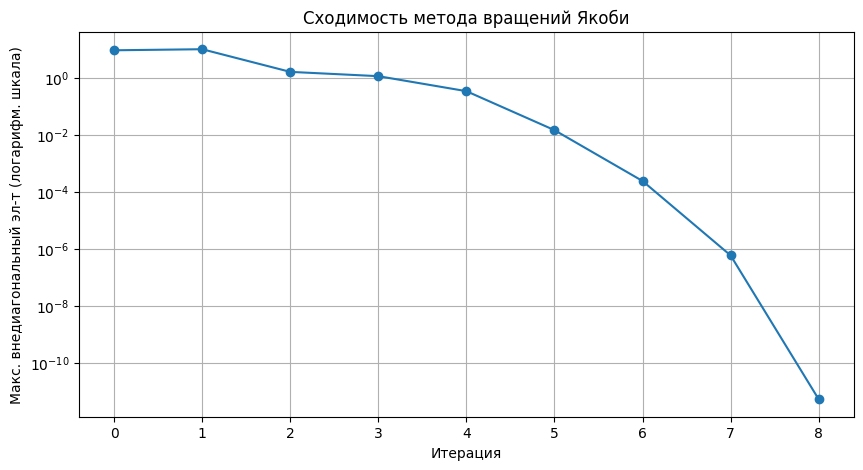

Собственные значения: [0.8, -19.3, 6.6] 

Собственные векторы:
[0.8, -0.6, -0.3]
[0.6, 0.6, 0.5]
[-0.2, -0.6, 0.8]
Число итераций: 8 

Проверка для λ_1 = 0.77 и v_1 = [0.8, -0.6, -0.3]:
Av_1 = [0.6, 0.5, -0.1]
λ_1v_1 = [0.6, 0.5, -0.1]
Результат: Успешно

Проверка для λ_2 = -19.34 и v_2 = [0.6, 0.6, 0.5]:
Av_2 = [11.5, -11.0, 11.0]
λ_2v_2 = [11.5, -11.0, 11.0]
Результат: Успешно

Проверка для λ_3 = 6.57 и v_3 = [-0.2, -0.6, 0.8]:
Av_3 = [-1.7, 3.5, 5.3]
λ_3v_3 = [-1.7, 3.5, 5.3]
Результат: Успешно



In [3]:
import math
import matplotlib.pyplot as plt

def create_matrix(n, m=None, fill=0):
    # Создает матрицу размером n x m с начальным заполнением fill (по умолчанию - нули)
    if m is None:
        m = n
    return [[fill for _ in range(m)] for _ in range(n)]

def matrix_multiply(A, B):
    # Умножает две матрицы A и B
    return [[sum(a*b for a, b in zip(A_row, B_col)) for B_col in zip(*B)] for A_row in A]

def transpose_matrix(M):
    # Транспонирует матрицу M
    return list(map(list, zip(*M)))

def matrix_diagonal(A):
    # Возвращает список диагональных элементов матрицы A
    return [A[i][i] for i in range(len(A))]

def off_diagonal_max(A):
    # Находит максимальный по модулю внедиагональный элемент матрицы A и его индексы
    n = len(A)
    max_value = 0
    for i in range(n):
        for j in range(i+1, n):
            if abs(A[i][j]) > max_value:
                max_value = abs(A[i][j])
                k, l = i, j
    return max_value, k, l

def create_rotation_matrix(A, k, l):
    # Создает матрицу вращения для обнуления элемента A[k][l]
    n = len(A)
    R = create_matrix(n, fill=0)
    for i in range(n):
        R[i][i] = 1
    if A[k][l] != 0:
        tau = (A[l][l] - A[k][k]) / (2 * A[k][l])
        t = math.copysign(1, tau) / (abs(tau) + math.sqrt(1 + tau**2))
        c = 1 / math.sqrt(1 + t**2)
        s = c * t
    else:
        c = 1
        s = 0
    R[k][k] = c
    R[l][l] = c
    R[k][l] = s
    R[l][k] = -s
    return R

def jacobi_rotation_method_with_graph(A, tolerance=1e-10):
    # Применяет метод Якоби к матрице A для нахождения собственных значений и векторов
    n = len(A)
    X = create_matrix(n, fill=0)
    for i in range(n):
        X[i][i] = 1
    iteration = 0
    errors = []
    while True:
        max_value, k, l = off_diagonal_max(A)
        errors.append(max_value)
        if max_value < tolerance:
            break  # Момент выхода из итераций, если достигнута заданная точность
        R = create_rotation_matrix(A, k, l)
        A = matrix_multiply(transpose_matrix(R), matrix_multiply(A, R))
        X = matrix_multiply(X, R)
        iteration += 1

    eigenvalues = matrix_diagonal(A)
    eigenvectors = X

    plt.figure(figsize=(10, 5))
    plt.semilogy(range(iteration + 1), errors, marker='o')
    plt.xlabel('Итерация')
    plt.ylabel('Макс. внедиагональный эл-т (логарифм. шкала)')
    plt.title('Сходимость метода вращений Якоби')
    plt.grid(True)
    plt.show()

    return eigenvalues, eigenvectors, iteration

def check_eigenvalues_and_eigenvectors(A, eigenvalues, eigenvectors, tolerance=1e-10):
    # Проверяет, соответствуют ли собственные значения и векторы матрице A
    n = len(eigenvalues)
    for i in range(n):
        Av = [sum(A[j][k] * eigenvectors[k][i] for k in range(n)) for j in range(n)]
        lv = [eigenvalues[i] * eigenvectors[j][i] for j in range(n)]
        print(f"Проверка для λ_{i+1} = {eigenvalues[i]:.2f} и v_{i+1} = {[round(elem, 1) for elem in eigenvectors[i]]}:")
        print(f"Av_{i+1} = {[round(elem, 1) for elem in Av]}")
        print(f"λ_{i+1}v_{i+1} = {[round(elem, 1) for elem in lv]}")
        if all(math.isclose(Av[j], lv[j], rel_tol=tolerance) for j in range(n)):
            print("Результат: Успешно\n")
        else:
            print("Результат: Неудача\n")

input_matrix = [
    [-6, 6, -8],
    [6, -4, 9],
    [-8, 9, -2]
]

eigenvalues, eigenvectors, iterations = jacobi_rotation_method_with_graph(input_matrix)

print("Собственные значения:", [round(ev, 1) for ev in eigenvalues], '\n')
print("Собственные векторы:")
for ev in eigenvectors:
    print([round(e, 1) for e in ev])
print("Число итераций:", iterations, '\n')

# Проверка собственных значений и векторов
check_eigenvalues_and_eigenvectors(input_matrix, eigenvalues, eigenvectors)

### 1.5  
Реализовать алгоритм QR – разложения матриц в виде программы. На его основе разработать программу, реализующую QR – алгоритм решения полной проблемы собственных значений произвольных матриц, задавая в качестве входных данных матрицу и точность вычислений. С использованием разработанного программного обеспечения найти собственные значения матрицы.

In [4]:
import math

def sign(x):
    # Возвращает знак числа x
    return 1 if x > 0 else -1 if x < 0 else 0

def norm(x):
    # Вычисляет Евклидову норму вектора x
    return math.sqrt(sum(xi**2 for xi in x))

def dot(a, b):
    # Вычисляет скалярное произведение векторов a и b
    return sum(ai * bi for ai, bi in zip(a, b))

def get_householder_matrix(A, col_num):
    n = len(A)
    v = [0] * n
    a = [row[col_num] for row in A]
    v[col_num] = a[col_num] + sign(a[col_num]) * norm(a[col_num:])
    for i in range(col_num + 1, n):
        v[i] = a[i]
    H = [[float(i == j) - 2 * v[i] * v[j] / (dot(v, v)) for j in range(n)] for i in range(n)]
    return H

def qr_decompose(A):
    # Выполняет QR-разложение матрицы A с помощью преобразований Хаусхолдера
    n = len(A)
    Q = [[float(i == j) for j in range(n)] for i in range(n)]
    A_i = [row[:] for row in A]
    for i in range(n - 1):
        H = get_householder_matrix(A_i, i)
        Q = [[sum(Q[i][k] * H[k][j] for k in range(n)) for j in range(n)] for i in range(n)]
        A_i = [[sum(H[i][k] * A_i[k][j] for k in range(n)) for j in range(n)] for i in range(n)]
    return Q, A_i

def get_roots(A, i):
    # Вычисляет корни квадратного уравнения, определенного диагональным блоком A[i:i+2, i:i+2]
    a11 = A[i][i]
    a12 = A[i][i + 1] if i + 1 < len(A) else 0
    a21 = A[i + 1][i] if i + 1 < len(A) else 0
    a22 = A[i + 1][i + 1] if i + 1 < len(A) else 0
    discriminant = (a11 + a22)**2 - 4 * (a11 * a22 - a12 * a21)
    if discriminant >= 0:
        root1 = (-a11 - a22 + math.sqrt(discriminant)) / 2
        root2 = (-a11 - a22 - math.sqrt(discriminant)) / 2
    else:
        real_part = (-a11 - a22) / 2
        imaginary_part = math.sqrt(-discriminant) / 2
        root1 = complex(real_part, imaginary_part)
        root2 = complex(real_part, -imaginary_part)
    return [root1, root2]

def is_complex(A, i, eps):
    # Проверяет, соответствуют ли вычисленные собственные значения для блока A[i:i+2, i:i+2] критериям стабильности
    Q, R = qr_decompose(A)
    A_next = [[sum(R[i][k] * Q[k][j] for k in range(len(A))) for j in range(len(A))] for i in range(len(A))]
    lambda1 = get_roots(A, i)
    lambda2 = get_roots(A_next, i)
    return abs(lambda1[0] - lambda2[0]) <= eps and abs(lambda1[1] - lambda2[1]) <= eps

def get_eigen_value(A, i, eps):
    # Вычисляет собственные значения блока матрицы A, начиная с элемента (i, i)
    A_i = [row[:] for row in A]
    while True:
        Q, R = qr_decompose(A_i)
        A_i = [[sum(R[i][k] * Q[k][j] for k in range(len(A))) for j in range(len(A))] for i in range(len(A))]
        if norm([A_i[j][i] for j in range(i + 1, len(A))]) <= eps:
            return A_i[i][i], A_i
        elif norm([A_i[j][i] for j in range(i + 2, len(A))]) <= eps and is_complex(A_i, i, eps):
            return get_roots(A_i, i), A_i

def qr_eigen_values(A, eps):
    # Итеративно применяет метод QR для вычисления всех собственных значений матрицы A
    n = len(A)
    A_i = [row[:] for row in A]
    eigen_values = []
    i = 0
    while i < n:
        cur_eigen_values, A_i_plus_1 = get_eigen_value(A_i, i, eps)
        if isinstance(cur_eigen_values, list):
            eigen_values.extend(cur_eigen_values)
            i += 2
        else:
            eigen_values.append(cur_eigen_values)
            i += 1
        A_i = A_i_plus_1
    return eigen_values

A = [
    [1, 2, 3, 1, 0],
    [6, 5, 4, -8, 9],
    [7, 0, 5, 0, -3],
    [1, 2, -4, 6, -6],
    [0, 1, 9, -3, 1]
]
eigenvalues = qr_eigen_values(A, 0.01)
print("Собственные значения:", eigenvalues)

Собственные значения: [10.372232531362837, (-5.987957875174352+5.41538339146273j), (-5.987957875174352-5.41538339146273j), (2.177876875155806+1.7937132636137394j), (2.177876875155806-1.7937132636137394j)]


In [9]:
A = [
    [9, 0, 2],
    [-6, 4, 4],
    [-2, -7, 5]
]

eigenvalues = qr_eigen_values(A, 0.01)
print("Собственные значения:", eigenvalues)

Собственные значения: [10.030898988340898, (-3.985764320136905+6.095060380309702j), (-3.985764320136905-6.095060380309702j)]
